In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# This will reload imports before executing code, allowing you to easily change contents of custom scripts
%load_ext autoreload
%autoreload 2

# Bounding box classifier, v1: density-based

**23.10.2020**

Find the bounding box ("bbox") which best captures the events within it.  
The bbox is limited in $x$ by the distance threshold (fixed) and some factor ($\geq 1$) of the time threshold.

This has since been extended beyond using a bounding box and has been updatede to use histograms as a first pass to get clusters.

**TODOs**  
1. Move all funcs to module(s)
2. Accuracy testing
3. Incorporate box-shifting, merging, box-ing refinements
4. Repeat 1-3 as needed.

In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

In [4]:
from synthetic_data.plotting import plot_trajectory, add_plot_trajectory, \
                                    add_plot_seg_boxes, add_plot_cluster_boxplots, \
                                    add_plot_cluster_order

In [5]:
from synthetic_data.trajectory import get_stay_segs, get_adjusted_stays

## Example 1

In [6]:
from synthetic_data.trajectory_class import get_pickle_trajectory
from stay_classification.metric_box_classifier.metric_box_classifier import stay_classifier_testing

time_thresh = 1/6
dist_thresh=0.25

In [7]:
fname = 'trajectory462_17stays'#__17stays_prec0o954_rec1o000

#path_to_file = '../../classifiers_playground/metric_box_classifier/testdata_training_set__canonical_3stays/' + fname 
path_to_file = '../../testdata/testdata_training_set__general/' + fname 
t_arr, r_arr, x_arr, segments = get_pickle_trajectory(path_to_file)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, t_arr))

In [8]:
!ls ../../classifiers_playground/metric_box_classifier/testdata_training_set__canonical_3stays/trajectory6_3stays.pkl

../../classifiers_playground/metric_box_classifier/testdata_training_set__canonical_3stays/trajectory6_3stays.pkl


### Classification

Load data

In [9]:
trajectory_nr = 204 #445 #488 #958 #445

trajectory_tag = f"trajectory{trajectory_nr}_{stays_tag}stays"    
path_to_file =  data_dir + trajectory_tag

In [10]:
!ls ../../testdata/testdata_training_set__general | grep -v "_1s\|_2\|_3\|_4\|_5"

MBC_plots
plots
trajectory102_6stays.pkl
trajectory127_6stays.pkl
trajectory130_6stays.pkl
trajectory138_6stays.pkl
trajectory142_6stays.pkl
trajectory153_7stays.pkl
trajectory154_6stays.pkl
trajectory15_6stays.pkl
trajectory161_7stays.pkl
trajectory16_7stays.pkl
trajectory172_12stays.pkl
trajectory178_7stays.pkl
trajectory180_6stays.pkl
trajectory183_7stays.pkl
trajectory187_6stays.pkl
trajectory197_10stays.pkl
trajectory20_6stays.pkl
trajectory21_14stays.pkl
trajectory220_6stays.pkl
trajectory221_12stays.pkl
trajectory224_8stays.pkl
trajectory228_8stays.pkl
trajectory230_7stays.pkl
trajectory237_6stays.pkl
trajectory248_7stays.pkl
trajectory25_8stays.pkl
trajectory261_6stays.pkl
trajectory268_8stays.pkl
trajectory280_11stays.pkl
trajectory281_7stays.pkl
trajectory306_6stays.pkl
trajectory30_7stays.pkl
trajectory324_8stays.pkl
trajectory329_11stays.pkl
trajectory330_6stays.pkl
trajectory339_6stays.pkl
trajectory344_6stays.pkl
trajectory346_7stays.pkl
trajectory348_9stays.pkl
trajector

In [11]:
fname = 'trajectory190_3stays'
fname = 'trajectory117_3stays'
fname = 'trajectory706_3stays'
fname = 'trajectory443_9stays'#trajectory306_6stays'#trajectory221_12stays'#trajectory997_9stays'#trajectory713_7stays'

path_to_file = '../../classifiers_playground/metric_box_classifier/testdata_training_set__canonical_3stays/' + fname 
path_to_file = '../../testdata/testdata_training_set__general/' + fname 

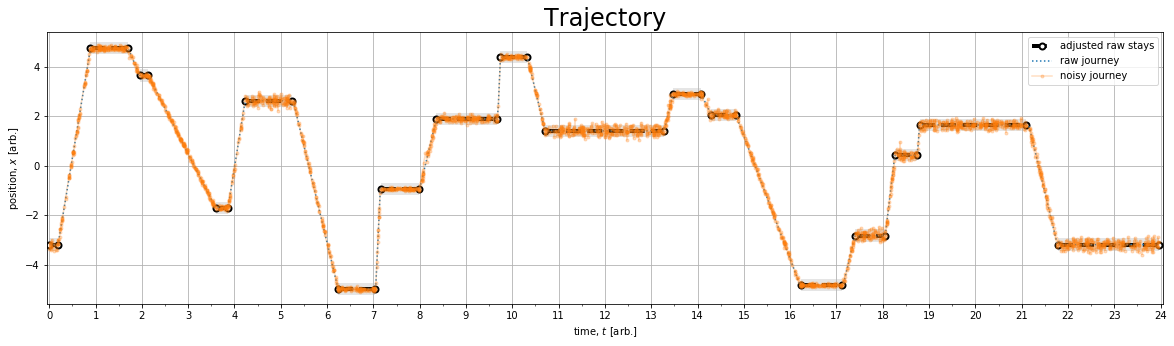

In [9]:
t_arr, r_arr, x_arr, segments = get_pickle_trajectory(path_to_file)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, t_arr))

#Plotting

fig, ax = plt.subplots(1,1,figsize=[20,5])

ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
#ax.set_xlim(0.7,23.3)
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)

ax.set_ylim(ylim);

In [10]:
from stay_classification.bounding_box_classifier.bounding_box_classifier_maxloc import plot_max_loc_

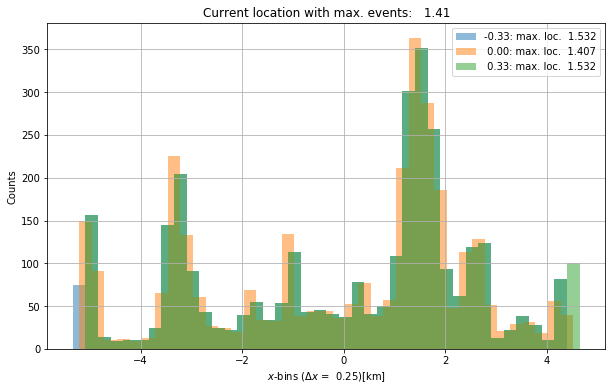

In [11]:
plot_max_loc_(dist_thresh)(x_arr)
plt.grid();

---

In [12]:
from stay_classification.bounding_box_classifier.bounding_box_classifier_gaps import *
from stay_classification.bounding_box_classifier.bounding_box_classifier_masks import *
from stay_classification.bounding_box_classifier.bounding_box_classifier_maxloc import 

## Putting it all together: `bounding_box_method`

### Walkthrough

An illustrated step-by-step for the first few steps.

Total nr of events: 3211
1: building cluster 0
	1.1.1. Loc:  1.407
		mask 1: 72 2842
			Splitting cluster
				 0.044,[0,8]
				 0.128,[9,29]
				 0.006,[30,35]
				 0.076,[36,40]
				 0.066,[41,53]
				 2.624,[54,384]
				 0.079,[385,395]
				 2.439,[396,574]
				longest subcluster:  2.624, index: 5
		mask 2: 1430 1785
	1.1.2. Mean:  1.413, median:  1.408
	1.1.3. Mask: [ 1430,  1785], Mask size: 331
	1.2. Bounds: 10.689, 13.314
--> --> --> Appending cluster
	1.3. gmask: 3211 == 2855 + 356

2: building cluster 1
	2.1.1. Loc:  1.657
		mask 1: 79 2478
			Splitting cluster
				 0.017,[0,5]
				 0.153,[6,24]
				 0.034,[25,32]
				 0.022,[33,35]
				 1.394,[36,133]
				 0.030,[134,141]
				 0.034,[142,147]
				 0.675,[148,158]
				 2.396,[159,470]
				longest subcluster:  2.396, index: 8
		mask 2: 2157 2478
	2.1.2. Mean:  1.646, median:  1.646
	2.1.3. Mask: [ 2513,  2834], Mask size: 312
	2.2. Bounds: 18.791, 21.187
--> --> --> Appending cluster
	2.3. gmask: 3211 == 2533 + 678

3: building 

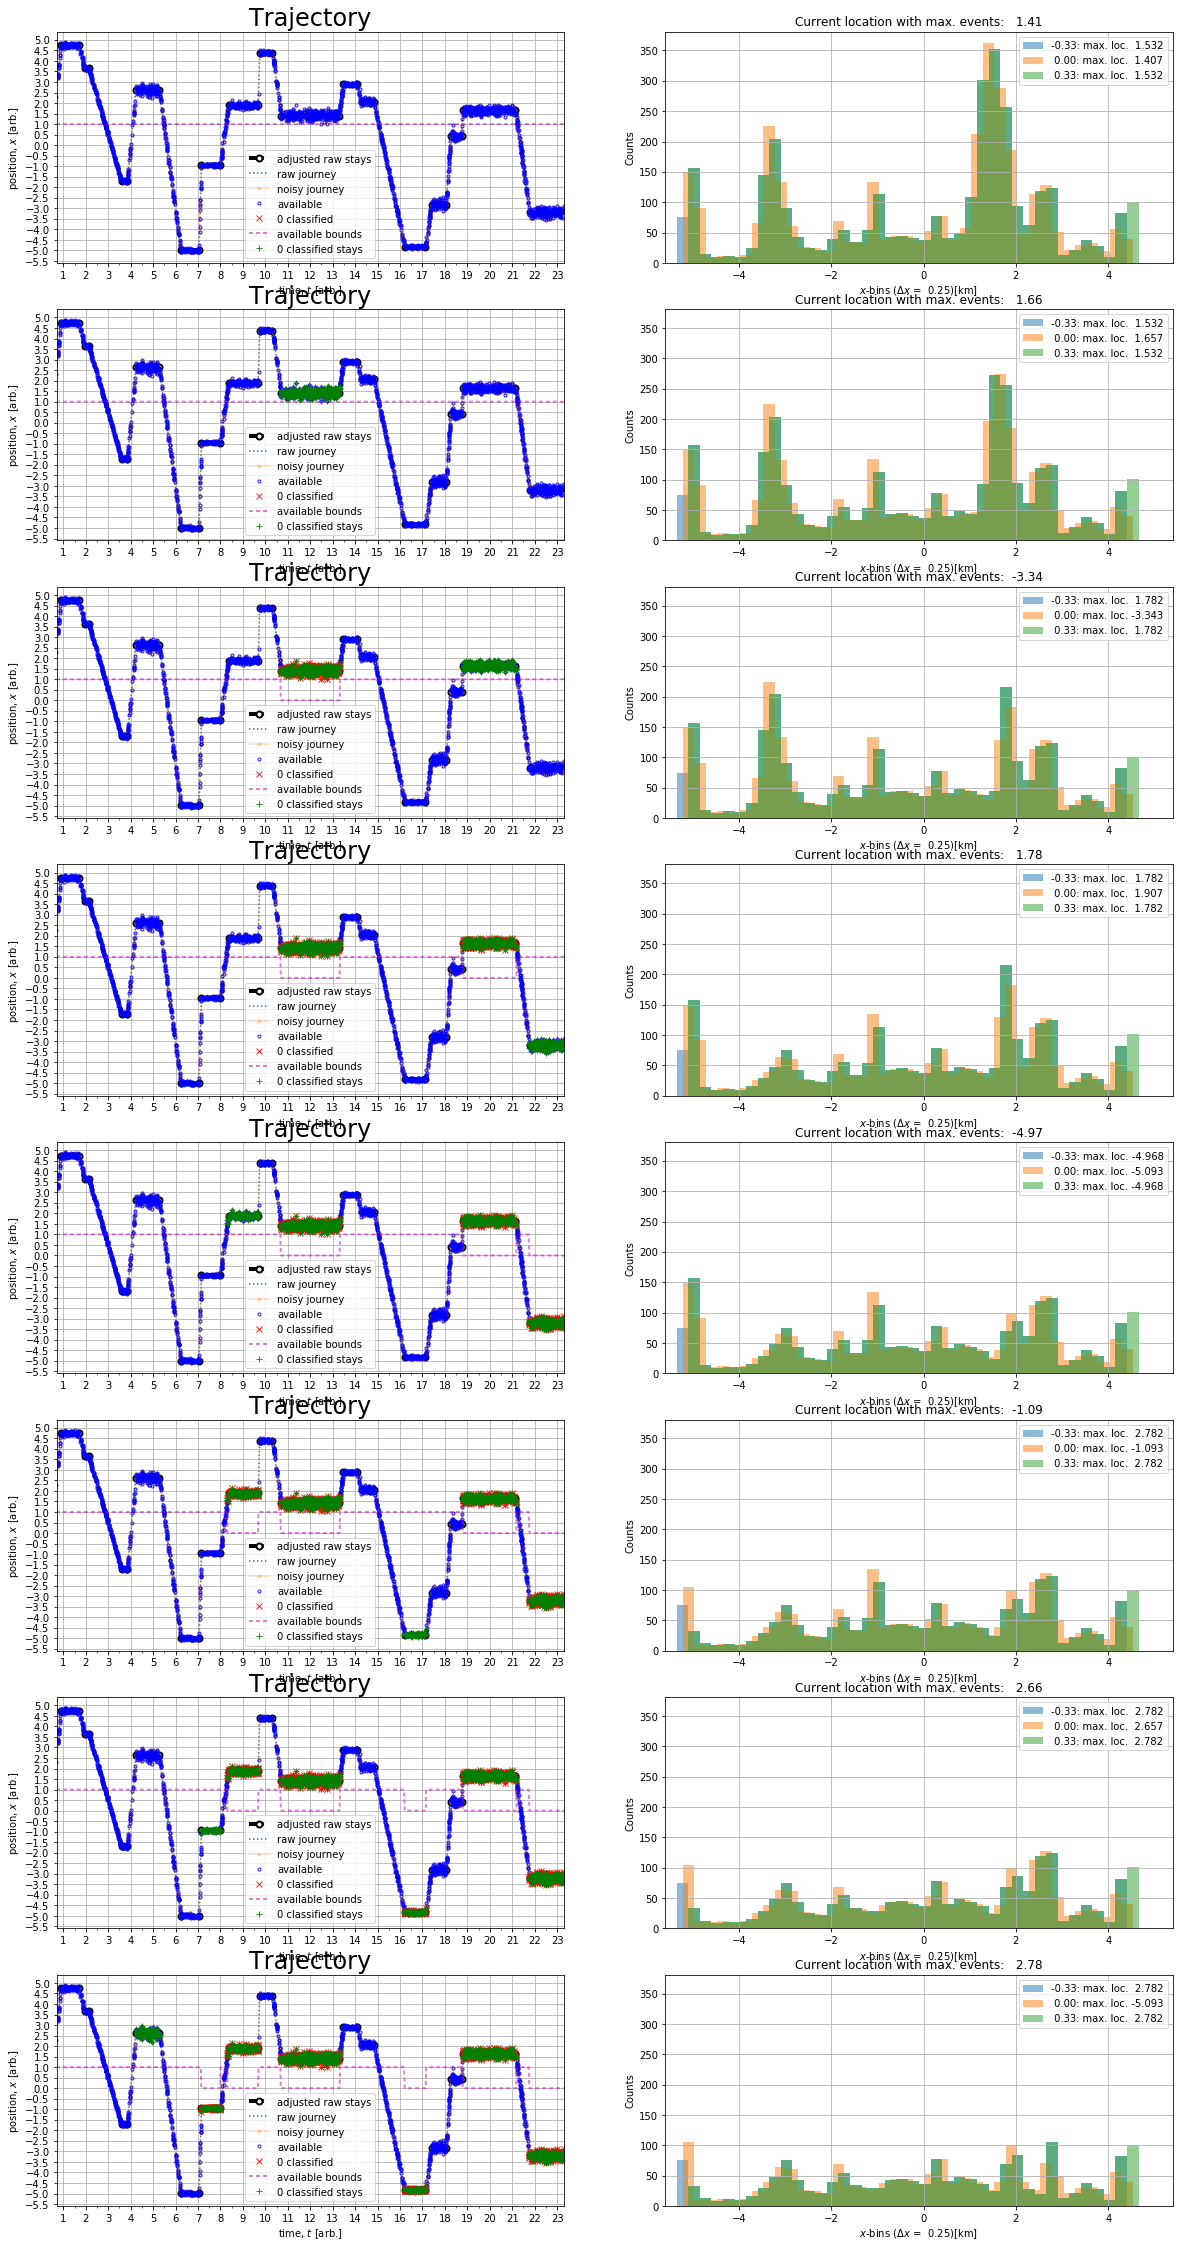

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [36]:
verbose = True
early_stopping=False

get_max_loc = lambda arr: get_max_loc_(dist_thresh)(arr)

# Initialize global mask array
gmask = np.array(x_arr.size*[True])
smask = np.array(x_arr.size*[True])

last_gmask_size = gmask[gmask].size

rows, cols = 8, 2
fig, axs = plt.subplots(rows, cols,figsize=[20,40])
axs = axs.flatten()

#--- PLOTTING
ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

ax = axs[0]
add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.plot(t_arr[gmask], x_arr[gmask], 'b.', markerfacecolor="None", alpha=0.85, label='available')
ax.plot(t_arr[gmask==False], x_arr[gmask==False], 'rx', markerfacecolor="None", alpha=0.85, label=f'{0} classified')
ax.plot(t_arr,gmask, color='m', linestyle='--', dashes=[2,1.5], lw=2, alpha=0.5, label='available bounds')    

ax.plot(t_arr[smask==False], x_arr[smask==False], 'g+', markerfacecolor="None", alpha=0.85, label=f'{0} classified stays')
ax.set_xlim(-0.1,24.1) 
ax.set_ylim(ylim)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.legend();

ax = axs[1]
_, max_counts, _ = plot_max_loc_(dist_thresh)(x_arr[gmask],ax);
ax.set_xlim(ylim)  
ax.set_ylim(0, max_counts+0.05*max_counts)  
ax.grid()
#--- PLOTTING

print("Total nr of events:", t_arr.size)


blockarrow = '--> --> --> '
n = 1
nn = 0 #1?
clusters = []

stop_early_counter = 0
##############################
nnn = 2
while nnn < rows*cols:

    if verbose: print(f'{n}: building cluster {nn}')

    # Get the location of the cluster with the max events
    loc = get_max_loc(x_arr[gmask])
    if verbose: print(f"\t{n}.1.1. Loc: {loc:6.3f}")

    #Get local mask based on bounding box
    mask = get_mask(t_arr[gmask], x_arr[gmask], loc, 2.5*time_thresh, dist_thresh, verbose)

    # These are the indices where the global mask is True;
    # ie., these promote the local mask to a global mask (see return)
    gmask_inds = np.where(gmask)[0]
    mask = gmask_inds[mask]
    
    # check if empty
    if mask.size > 0:
        
        
        ax = axs[nnn]
        add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax);
        ax.plot(t_arr[gmask], x_arr[gmask], 'b.', markerfacecolor="None", alpha=0.85, label='available')
        ax.plot(t_arr[gmask==False], x_arr[gmask==False], 'rx', markerfacecolor="None", alpha=0.85, label=f'{0} classified')
        ax.plot(t_arr,gmask, color='m', linestyle='--', dashes=[2,1.5], lw=2, alpha=0.5, label='available bounds')    

        if verbose: print(f"\t{n}.1.2. Mean: {np.mean(x_arr[mask]):6.3f}, median: {np.median(x_arr[mask]):6.3f}")
        if verbose: print(f"\t{n}.1.3. Mask: [{mask[0]:5d}, {mask[-1]:5d}], Mask size: {mask.size:2d}")

        if verbose: print(f"\t{n}.2. Bounds: {t_arr[mask].min():6.3f}, {t_arr[mask].max():6.3f}")                
        # Create the bounding box (needed? if wanting to optimize the box, do here)
        bounds = np.array([t_arr[mask].min(), t_arr[mask].max()])            
        
        # Update the global mask
        # NOTE: doing this before the cluster append for the plotting
        gmask = update_global_mask(gmask, t_arr, bounds)        
        
        # Check the duration, save the cluster if it is long enough
        if t_arr[mask].max()-t_arr[mask].min()>time_thresh:
            smask = update_global_mask(smask, t_arr, bounds)
            clusters.append(mask)
            # This is a fail safe in case it goes to far: 
            #    * no one will have 20 clusters --> make smaller!                
            nn+=1
            if verbose: print(f"{blockarrow}Appending cluster")
            stop_early_counter = 0
        else:
            if verbose: print(f"{blockarrow}Too short, no append: {(t_arr[mask].max()-t_arr[mask].min()):6.4f} < {time_thresh:6.4f}")
            stop_early_counter += 1

        ax.plot(t_arr[smask==False], x_arr[smask==False], 'g+', markerfacecolor="None", alpha=0.85, label=f'{0} classified stays')
        ax.set_xlim(-0.1,24.1) 
        ax.set_ylim(ylim)
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.legend();
            
        if verbose: print(f"\t{n}.3. gmask:",gmask.size, "==", gmask[gmask].size,"+",gmask[gmask==False].size)
        
        # Stop when there are more than 3 consecutive append-skips
        if (early_stopping) & (stop_early_counter >= 3):
            if verbose: print(f"\n{blockarrow}Early stopping")
            break
        
        # Stop when there are no more events available
        if gmask[gmask==False].size == gmask.size: 
            if verbose: print(f"\n{blockarrow}Breaking due to saturation")
            break

        ax = axs[nnn+1]
        plot_max_loc_(dist_thresh)(x_arr[gmask],ax);
        ax.set_xlim(ylim)  
        ax.set_ylim(0, max_counts+0.05*max_counts)  
        ax.grid()

    else:
        # Need to add even a single point to the global mask; 
        # breaking would exit prematurely
        if verbose: print(f"\n{blockarrow}Too short, no append: single event")
        if verbose: print(f"{blockarrow}Breaking due to single-event mask")                
        break # Can't continue: otherwise would endlessly loop
    
    # This is a fail safe in case it goes to far: 
    #    * no one will have 50 clusters --> make smaller!  
    nnn += 2
    n += 1
    
    print()

print('The trajectories show the clusters and the boundary of available events\n',
     'the histograms show the locations of available clusters');

Total nr of events: 3211
1: building cluster 0
	1.1.1. Loc:  2.782
		mask 1: 326 1116
			Splitting cluster
				 0.151,[0,16]
				 0.046,[17,26]
				 0.811,[27,125]
				longest subcluster:  0.811, index: 2
		mask 2: 1010 1116
	1.1.2. Mean:  2.874, median:  2.890
	1.1.3. Mask: [ 1805,  1911], Mask size: 99
	1.2. Bounds: 13.411, 14.223
--> --> --> Appending cluster
	1.3. gmask: 3211 == 1565 + 1646

2: building cluster 1
	2.1.1. Loc: -5.093
		mask 1: 703 807
			No gaps
		mask 2: 703 807
	2.1.2. Mean: -4.992, median: -4.992
	2.1.3. Mask: [  856,   960], Mask size: 105
	2.2. Bounds:  6.224,  7.044
--> --> --> Appending cluster
	2.3. gmask: 3211 == 1460 + 1751

3: building cluster 2
	3.1.1. Loc:  4.593
		mask 1: 111 837
			Splitting cluster
				 0.933,[0,138]
				 0.567,[139,198]
				longest subcluster:  0.933, index: 0
		mask 2: 111 255
	3.1.2. Mean:  4.717, median:  4.732
	3.1.3. Mask: [  111,   255], Mask size: 139
	3.2. Bounds:  0.865,  1.798
--> --> --> Appending cluster
	3.3. gmask: 321

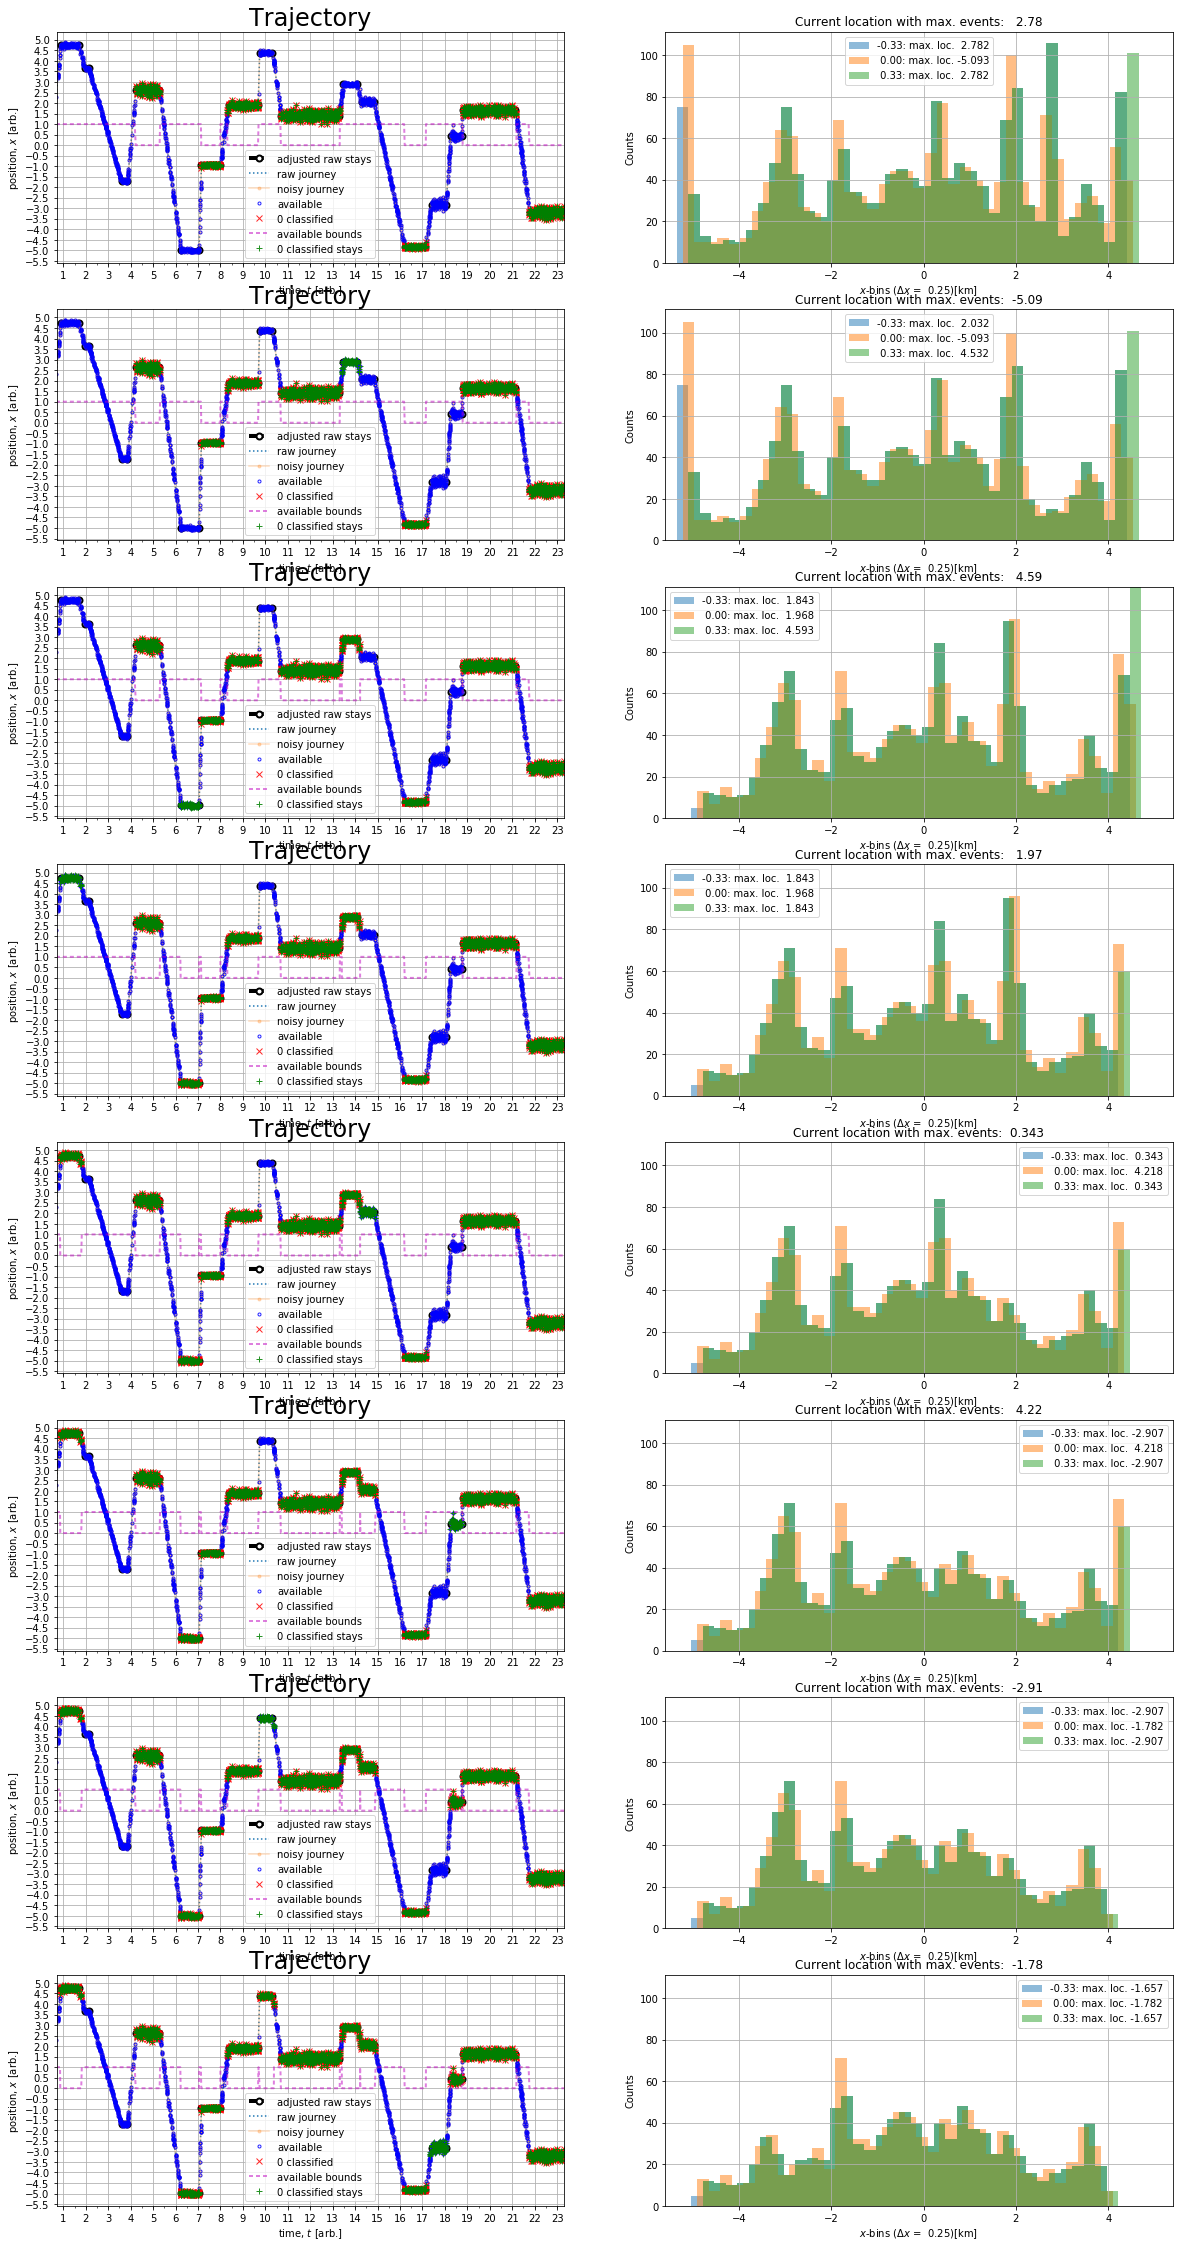

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [37]:
rows, cols = 8, 2
fig, axs = plt.subplots(rows, cols,figsize=[20,40])
axs = axs.flatten()

#--- PLOTTING
ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

ax = axs[0]
add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.plot(t_arr[gmask], x_arr[gmask], 'b.', markerfacecolor="None", alpha=0.85, label='available')
ax.plot(t_arr[gmask==False], x_arr[gmask==False], 'rx', markerfacecolor="None", alpha=0.85, label=f'{0} classified')
ax.plot(t_arr,gmask, color='m', linestyle='--', dashes=[2,1.5], lw=2, alpha=0.5, label='available bounds')    

ax.plot(t_arr[smask==False], x_arr[smask==False], 'g+', markerfacecolor="None", alpha=0.85, label=f'{0} classified stays')
ax.set_xlim(-0.1,24.1) 
ax.set_ylim(ylim)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.legend();

ax = axs[1]
_, max_counts, _ = plot_max_loc_(dist_thresh)(x_arr[gmask],ax);
ax.set_xlim(ylim)  
ax.set_ylim(0, max_counts+0.05*max_counts)  
ax.grid()
#--- PLOTTING

print("Total nr of events:", t_arr.size)


blockarrow = '--> --> --> '
n = 1
nn = 0 #1?
clusters = []

stop_early_counter = 0
##############################
nnn = 2
while nnn < rows*cols:

    if verbose: print(f'{n}: building cluster {nn}')

    # Get the location of the cluster with the max events
    loc = get_max_loc(x_arr[gmask])
    if verbose: print(f"\t{n}.1.1. Loc: {loc:6.3f}")

    #Get local mask based on bounding box
    mask = get_mask(t_arr[gmask], x_arr[gmask], loc, 2.5*time_thresh, dist_thresh, verbose)

    # These are the indices where the global mask is True;
    # ie., these promote the local mask to a global mask (see return)
    gmask_inds = np.where(gmask)[0]
    mask = gmask_inds[mask]
    
    # check if empty
    if mask.size > 0:
        
        
        ax = axs[nnn]
        add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax);
        ax.plot(t_arr[gmask], x_arr[gmask], 'b.', markerfacecolor="None", alpha=0.85, label='available')
        ax.plot(t_arr[gmask==False], x_arr[gmask==False], 'rx', markerfacecolor="None", alpha=0.85, label=f'{0} classified')
        ax.plot(t_arr,gmask, color='m', linestyle='--', dashes=[2,1.5], lw=2, alpha=0.5, label='available bounds')    

        if verbose: print(f"\t{n}.1.2. Mean: {np.mean(x_arr[mask]):6.3f}, median: {np.median(x_arr[mask]):6.3f}")
        if verbose: print(f"\t{n}.1.3. Mask: [{mask[0]:5d}, {mask[-1]:5d}], Mask size: {mask.size:2d}")

        if verbose: print(f"\t{n}.2. Bounds: {t_arr[mask].min():6.3f}, {t_arr[mask].max():6.3f}")                
        # Create the bounding box (needed? if wanting to optimize the box, do here)
        bounds = np.array([t_arr[mask].min(), t_arr[mask].max()])            
        
        # Update the global mask
        # NOTE: doing this before the cluster append for the plotting
        gmask = update_global_mask(gmask, t_arr, bounds)        
        
        # Check the duration, save the cluster if it is long enough
        if t_arr[mask].max()-t_arr[mask].min()>time_thresh:
            smask = update_global_mask(smask, t_arr, bounds)
            clusters.append(mask)
            # This is a fail safe in case it goes to far: 
            #    * no one will have 20 clusters --> make smaller!                
            nn+=1
            if verbose: print(f"{blockarrow}Appending cluster")
            stop_early_counter = 0
        else:
            if verbose: print(f"{blockarrow}Too short, no append: {(t_arr[mask].max()-t_arr[mask].min()):6.4f} < {time_thresh:6.4f}")
            stop_early_counter += 1

        ax.plot(t_arr[smask==False], x_arr[smask==False], 'g+', markerfacecolor="None", alpha=0.85, label=f'{0} classified stays')
        ax.set_xlim(-0.1,24.1) 
        ax.set_ylim(ylim)
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.legend();
            
        if verbose: print(f"\t{n}.3. gmask:",gmask.size, "==", gmask[gmask].size,"+",gmask[gmask==False].size)
        
        # Stop when there are more than 3 consecutive append-skips
        if (early_stopping) & (stop_early_counter >= 3):
            if verbose: print(f"\n{blockarrow}Early stopping")
            break
        
        # Stop when there are no more events available
        if gmask[gmask==False].size == gmask.size: 
            if verbose: print(f"\n{blockarrow}Breaking due to saturation")
            break

        ax = axs[nnn+1]
        plot_max_loc_(dist_thresh)(x_arr[gmask],ax);
        ax.set_xlim(ylim)  
        ax.set_ylim(0, max_counts+0.05*max_counts)  
        ax.grid()

    else:
        # Need to add even a single point to the global mask; 
        # breaking would exit prematurely
        if verbose: print(f"\n{blockarrow}Too short, no append: single event")
        if verbose: print(f"{blockarrow}Breaking due to single-event mask")                
        break # Can't continue: otherwise would endlessly loop
    
    # This is a fail safe in case it goes to far: 
    #    * no one will have 50 clusters --> make smaller!  
    nnn += 2
    n += 1
    
    print()

print('The trajectories show the clusters and the boundary of available events\n',
     'the histograms show the locations of available clusters');

Total nr of events: 3211
1: building cluster 0
	1.1.1. Loc: -1.782
		mask 1: 42 964
			Splitting cluster
				 0.000,[0,0]
				 0.362,[1,51]
				 0.034,[52,56]
				 0.004,[57,59]
				 0.109,[60,78]
				 0.006,[79,81]
				 0.066,[82,88]
				longest subcluster:  0.362, index: 1
		mask 2: 365 419
	1.1.2. Mean: -1.681, median: -1.679
	1.1.3. Mask: [  510,   564], Mask size: 51
	1.2. Bounds:  3.511,  3.873
--> --> --> Appending cluster
	1.3. gmask: 3211 == 922 + 2289

2: building cluster 1
	2.1.1. Loc:  0.843
		mask 1: 70 860
			Splitting cluster
				 0.000,[0,0]
				 0.177,[1,35]
				 0.006,[36,37]
				 0.069,[38,47]
				 0.090,[48,56]
				 0.073,[57,66]
				 0.001,[67,68]
				 0.089,[69,79]
				longest subcluster:  0.177, index: 1
		mask 2: 251 293
	2.1.2. Mean:  0.873, median:  0.881
	2.1.3. Mask: [  396,   438], Mask size: 35
	2.2. Bounds:  2.813,  2.991
--> --> --> Appending cluster
	2.3. gmask: 3211 == 879 + 2332

3: building cluster 2
	3.1.1. Loc: -0.407
		mask 1: 45 843
			Splitting 

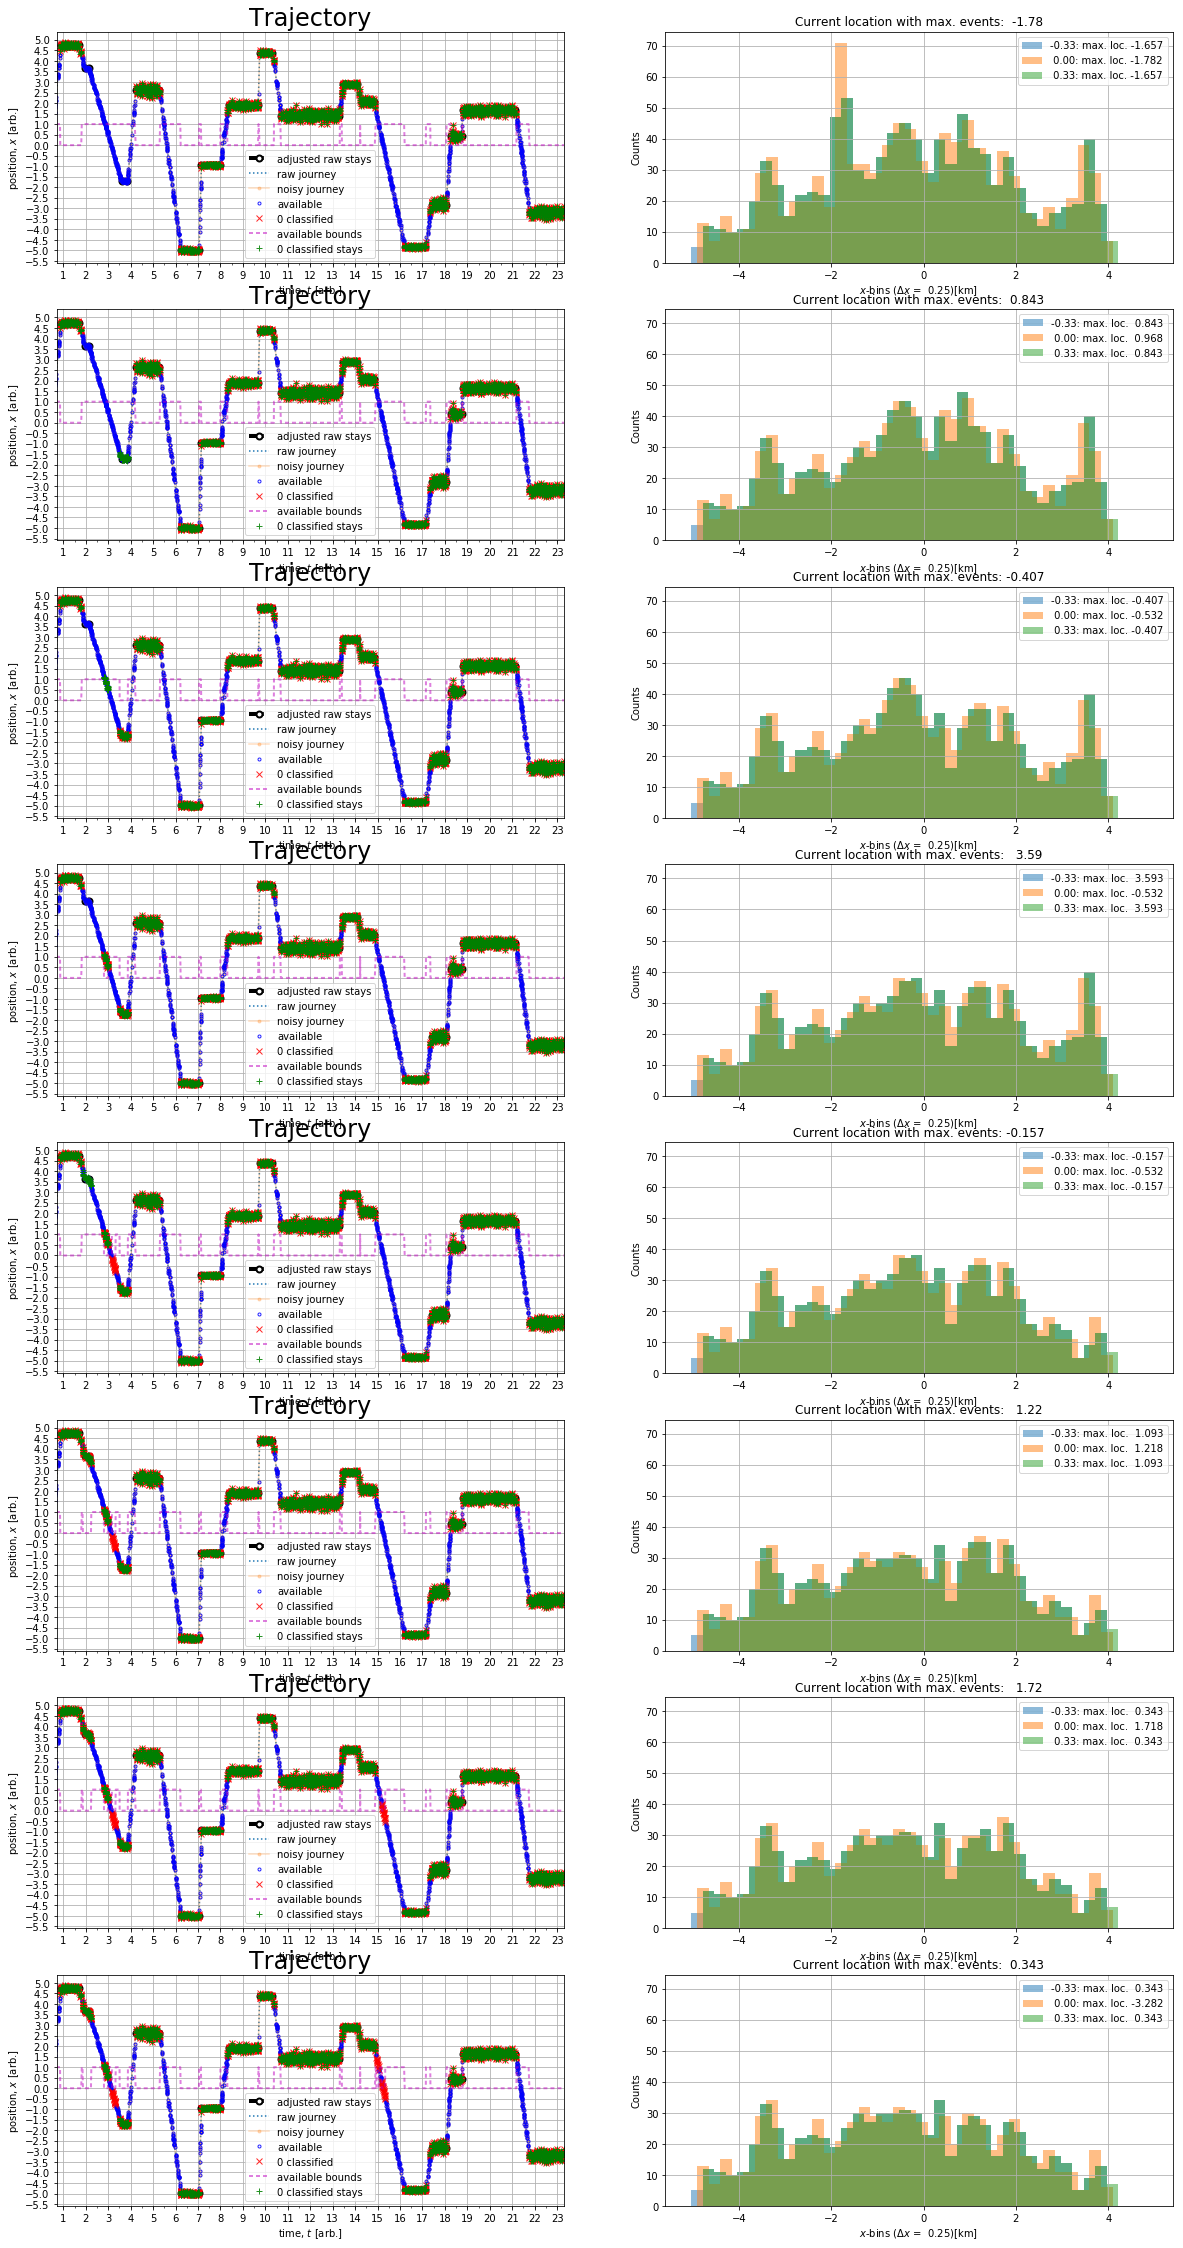

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [38]:
rows, cols = 8, 2
fig, axs = plt.subplots(rows, cols,figsize=[20,40])
axs = axs.flatten()

#--- PLOTTING
ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

ax = axs[0]
add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.plot(t_arr[gmask], x_arr[gmask], 'b.', markerfacecolor="None", alpha=0.85, label='available')
ax.plot(t_arr[gmask==False], x_arr[gmask==False], 'rx', markerfacecolor="None", alpha=0.85, label=f'{0} classified')
ax.plot(t_arr,gmask, color='m', linestyle='--', dashes=[2,1.5], lw=2, alpha=0.5, label='available bounds')    

ax.plot(t_arr[smask==False], x_arr[smask==False], 'g+', markerfacecolor="None", alpha=0.85, label=f'{0} classified stays')
ax.set_xlim(-0.1,24.1) 
ax.set_ylim(ylim)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.legend();

ax = axs[1]
_, max_counts, _ = plot_max_loc_(dist_thresh)(x_arr[gmask],ax);
ax.set_xlim(ylim)  
ax.set_ylim(0, max_counts+0.05*max_counts)  
ax.grid()
#--- PLOTTING

print("Total nr of events:", t_arr.size)


blockarrow = '--> --> --> '
n = 1
nn = 0 #1?
clusters = []

stop_early_counter = 0
##############################
nnn = 2
while nnn < rows*cols:

    if verbose: print(f'{n}: building cluster {nn}')

    # Get the location of the cluster with the max events
    loc = get_max_loc(x_arr[gmask])
    if verbose: print(f"\t{n}.1.1. Loc: {loc:6.3f}")

    #Get local mask based on bounding box
    mask = get_mask(t_arr[gmask], x_arr[gmask], loc, 2.5*time_thresh, dist_thresh, verbose)

    # These are the indices where the global mask is True;
    # ie., these promote the local mask to a global mask (see return)
    gmask_inds = np.where(gmask)[0]
    mask = gmask_inds[mask]
    
    # check if empty
    if mask.size > 0:
        
        
        ax = axs[nnn]
        add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax);
        ax.plot(t_arr[gmask], x_arr[gmask], 'b.', markerfacecolor="None", alpha=0.85, label='available')
        ax.plot(t_arr[gmask==False], x_arr[gmask==False], 'rx', markerfacecolor="None", alpha=0.85, label=f'{0} classified')
        ax.plot(t_arr,gmask, color='m', linestyle='--', dashes=[2,1.5], lw=2, alpha=0.5, label='available bounds')    

        if verbose: print(f"\t{n}.1.2. Mean: {np.mean(x_arr[mask]):6.3f}, median: {np.median(x_arr[mask]):6.3f}")
        if verbose: print(f"\t{n}.1.3. Mask: [{mask[0]:5d}, {mask[-1]:5d}], Mask size: {mask.size:2d}")

        if verbose: print(f"\t{n}.2. Bounds: {t_arr[mask].min():6.3f}, {t_arr[mask].max():6.3f}")                
        # Create the bounding box (needed? if wanting to optimize the box, do here)
        bounds = np.array([t_arr[mask].min(), t_arr[mask].max()])            
        
        # Update the global mask
        # NOTE: doing this before the cluster append for the plotting
        gmask = update_global_mask(gmask, t_arr, bounds)        
        
        # Check the duration, save the cluster if it is long enough
        if t_arr[mask].max()-t_arr[mask].min()>time_thresh:
            smask = update_global_mask(smask, t_arr, bounds)
            clusters.append(mask)
            # This is a fail safe in case it goes to far: 
            #    * no one will have 20 clusters --> make smaller!                
            nn+=1
            if verbose: print(f"{blockarrow}Appending cluster")
            stop_early_counter = 0
        else:
            if verbose: print(f"{blockarrow}Too short, no append: {(t_arr[mask].max()-t_arr[mask].min()):6.4f} < {time_thresh:6.4f}")
            stop_early_counter += 1

        ax.plot(t_arr[smask==False], x_arr[smask==False], 'g+', markerfacecolor="None", alpha=0.85, label=f'{0} classified stays')
        ax.set_xlim(-0.1,24.1) 
        ax.set_ylim(ylim)
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.legend();
            
        if verbose: print(f"\t{n}.3. gmask:",gmask.size, "==", gmask[gmask].size,"+",gmask[gmask==False].size)
        
        # Stop when there are more than 3 consecutive append-skips
        if (early_stopping) & (stop_early_counter >= 3):
            if verbose: print(f"\n{blockarrow}Early stopping")
            break
        
        # Stop when there are no more events available
        if gmask[gmask==False].size == gmask.size: 
            if verbose: print(f"\n{blockarrow}Breaking due to saturation")
            break

        ax = axs[nnn+1]
        plot_max_loc_(dist_thresh)(x_arr[gmask],ax);
        ax.set_xlim(ylim)  
        ax.set_ylim(0, max_counts+0.05*max_counts)  
        ax.grid()

    else:
        # Need to add even a single point to the global mask; 
        # breaking would exit prematurely
        if verbose: print(f"\n{blockarrow}Too short, no append: single event")
        if verbose: print(f"{blockarrow}Breaking due to single-event mask")                
        break # Can't continue: otherwise would endlessly loop
    
    # This is a fail safe in case it goes to far: 
    #    * no one will have 50 clusters --> make smaller!  
    nnn += 2
    n += 1
    
    print()

print('The trajectories show the clusters and the boundary of available events\n',
     'the histograms show the locations of available clusters');

Total nr of events: 3211
1: building cluster 0
	1.1.1. Loc:  0.343
		mask 1: 58 689
			Splitting cluster
				 0.039,[0,11]
				 0.074,[12,22]
				 0.000,[23,23]
				 0.056,[24,30]
				 0.092,[31,39]
				 0.049,[40,50]
				 0.084,[51,56]
				longest subcluster:  0.092, index: 4
		mask 2: 389 398
	1.1.2. Mean:  0.408, median:  0.471
	1.1.3. Mask: [ 1101,  1110], Mask size:  9
	1.2. Bounds:  8.084,  8.176
--> --> --> Too short, no append: 0.0919 < 0.1667
	1.3. gmask: 3211 == 734 + 2477

2: building cluster 0
	2.1.1. Loc: -3.282
		mask 1: 0 616
			Splitting cluster
				 0.187,[0,23]
				 0.039,[24,31]
				 0.009,[32,33]
				 0.108,[34,53]
				 0.037,[54,62]
				longest subcluster:  0.187, index: 0
		mask 2: 0 26
	2.1.2. Mean: -3.240, median: -3.231
	2.1.3. Mask: [    0,    26], Mask size: 24
	2.2. Bounds:  0.003,  0.190
--> --> --> Appending cluster
	2.3. gmask: 3211 == 707 + 2504

3: building cluster 1
	3.1.1. Loc: -1.282
		mask 1: 16 687
			Splitting cluster
				 0.004,[0,1]
				 0.503,[

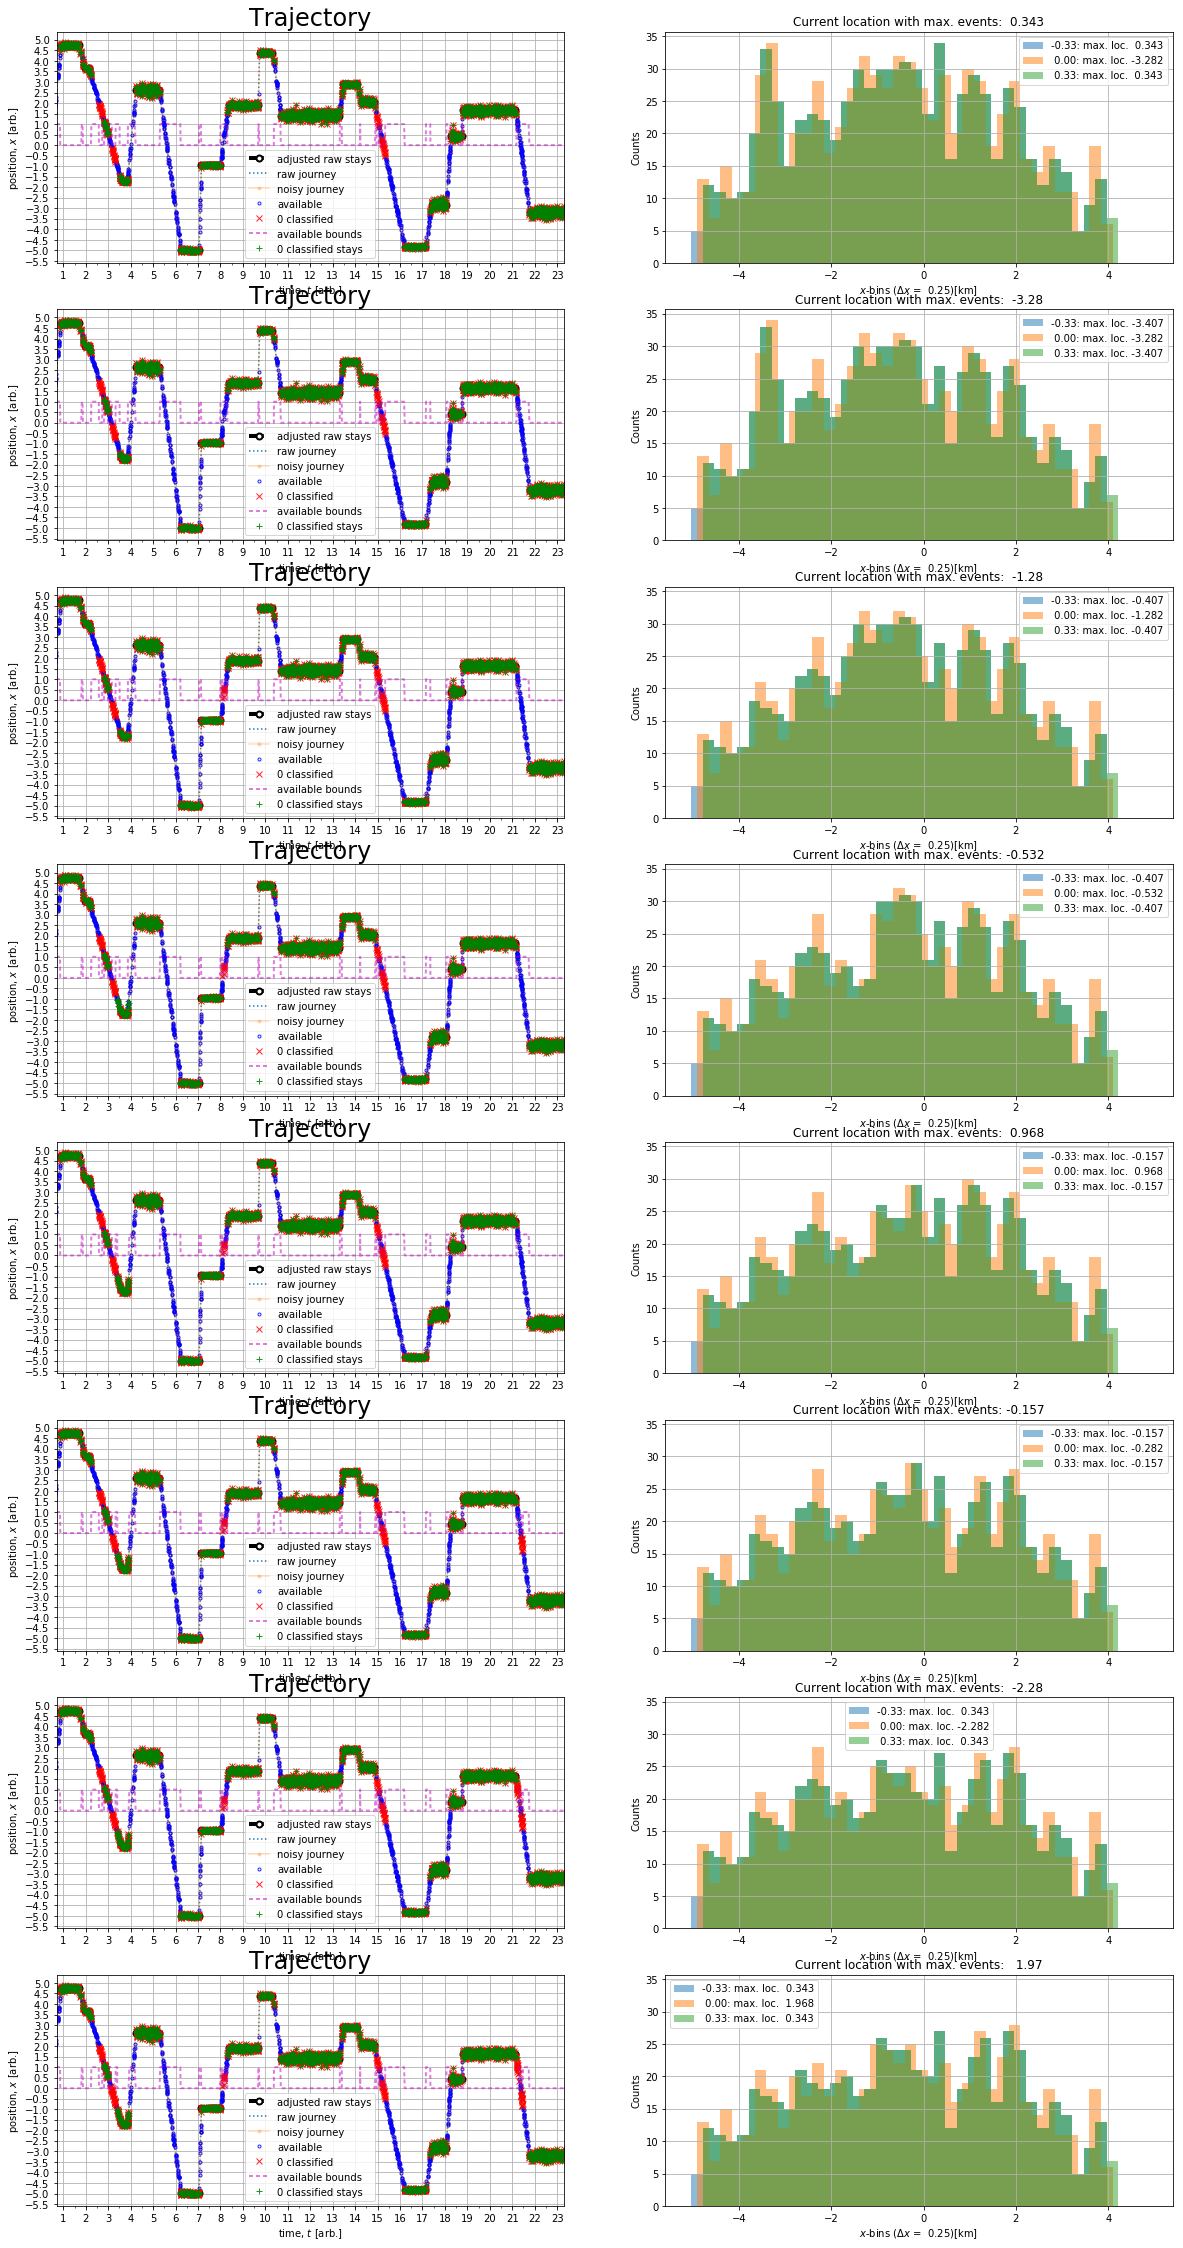

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [39]:
rows, cols = 8, 2
fig, axs = plt.subplots(rows, cols,figsize=[20,40])
axs = axs.flatten()

#--- PLOTTING
ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

ax = axs[0]
add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.plot(t_arr[gmask], x_arr[gmask], 'b.', markerfacecolor="None", alpha=0.85, label='available')
ax.plot(t_arr[gmask==False], x_arr[gmask==False], 'rx', markerfacecolor="None", alpha=0.85, label=f'{0} classified')
ax.plot(t_arr,gmask, color='m', linestyle='--', dashes=[2,1.5], lw=2, alpha=0.5, label='available bounds')    

ax.plot(t_arr[smask==False], x_arr[smask==False], 'g+', markerfacecolor="None", alpha=0.85, label=f'{0} classified stays')
ax.set_xlim(-0.1,24.1) 
ax.set_ylim(ylim)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.legend();

ax = axs[1]
_, max_counts, _ = plot_max_loc_(dist_thresh)(x_arr[gmask],ax);
ax.set_xlim(ylim)  
ax.set_ylim(0, max_counts+0.05*max_counts)  
ax.grid()
#--- PLOTTING

print("Total nr of events:", t_arr.size)


blockarrow = '--> --> --> '
n = 1
nn = 0 #1?
clusters = []

stop_early_counter = 0
##############################
nnn = 2
while nnn < rows*cols:

    if verbose: print(f'{n}: building cluster {nn}')

    # Get the location of the cluster with the max events
    loc = get_max_loc(x_arr[gmask])
    if verbose: print(f"\t{n}.1.1. Loc: {loc:6.3f}")

    #Get local mask based on bounding box
    mask = get_mask(t_arr[gmask], x_arr[gmask], loc, 2.5*time_thresh, dist_thresh, verbose)

    # These are the indices where the global mask is True;
    # ie., these promote the local mask to a global mask (see return)
    gmask_inds = np.where(gmask)[0]
    mask = gmask_inds[mask]
    
    # check if empty
    if mask.size > 0:
        
        
        ax = axs[nnn]
        add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax);
        ax.plot(t_arr[gmask], x_arr[gmask], 'b.', markerfacecolor="None", alpha=0.85, label='available')
        ax.plot(t_arr[gmask==False], x_arr[gmask==False], 'rx', markerfacecolor="None", alpha=0.85, label=f'{0} classified')
        ax.plot(t_arr,gmask, color='m', linestyle='--', dashes=[2,1.5], lw=2, alpha=0.5, label='available bounds')    

        if verbose: print(f"\t{n}.1.2. Mean: {np.mean(x_arr[mask]):6.3f}, median: {np.median(x_arr[mask]):6.3f}")
        if verbose: print(f"\t{n}.1.3. Mask: [{mask[0]:5d}, {mask[-1]:5d}], Mask size: {mask.size:2d}")

        if verbose: print(f"\t{n}.2. Bounds: {t_arr[mask].min():6.3f}, {t_arr[mask].max():6.3f}")                
        # Create the bounding box (needed? if wanting to optimize the box, do here)
        bounds = np.array([t_arr[mask].min(), t_arr[mask].max()])            
        
        # Update the global mask
        # NOTE: doing this before the cluster append for the plotting
        gmask = update_global_mask(gmask, t_arr, bounds)        
        
        # Check the duration, save the cluster if it is long enough
        if t_arr[mask].max()-t_arr[mask].min()>time_thresh:
            smask = update_global_mask(smask, t_arr, bounds)
            clusters.append(mask)
            # This is a fail safe in case it goes to far: 
            #    * no one will have 20 clusters --> make smaller!                
            nn+=1
            if verbose: print(f"{blockarrow}Appending cluster")
            stop_early_counter = 0
        else:
            if verbose: print(f"{blockarrow}Too short, no append: {(t_arr[mask].max()-t_arr[mask].min()):6.4f} < {time_thresh:6.4f}")
            stop_early_counter += 1

        ax.plot(t_arr[smask==False], x_arr[smask==False], 'g+', markerfacecolor="None", alpha=0.85, label=f'{0} classified stays')
        ax.set_xlim(-0.1,24.1) 
        ax.set_ylim(ylim)
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.legend();
            
        if verbose: print(f"\t{n}.3. gmask:",gmask.size, "==", gmask[gmask].size,"+",gmask[gmask==False].size)
        
        # Stop when there are more than 3 consecutive append-skips
        if (early_stopping) & (stop_early_counter >= 3):
            if verbose: print(f"\n{blockarrow}Early stopping")
            break
        
        # Stop when there are no more events available
        if gmask[gmask==False].size == gmask.size: 
            if verbose: print(f"\n{blockarrow}Breaking due to saturation")
            break

        ax = axs[nnn+1]
        plot_max_loc_(dist_thresh)(x_arr[gmask],ax);
        ax.set_xlim(ylim)  
        ax.set_ylim(0, max_counts+0.05*max_counts)  
        ax.grid()

    else:
        # Need to add even a single point to the global mask; 
        # breaking would exit prematurely
        if verbose: print(f"\n{blockarrow}Too short, no append: single event")
        if verbose: print(f"{blockarrow}Breaking due to single-event mask")                
        break # Can't continue: otherwise would endlessly loop
    
    # This is a fail safe in case it goes to far: 
    #    * no one will have 50 clusters --> make smaller!  
    nnn += 2
    n += 1
    
    print()

print('The trajectories show the clusters and the boundary of available events\n',
     'the histograms show the locations of available clusters');

Total nr of events: 3211
1: building cluster 0
	1.1.1. Loc:  1.968
		mask 1: 54 401
			Splitting cluster
				 0.040,[0,10]
				 0.066,[11,20]
				 0.016,[21,23]
				 0.062,[24,29]
				 0.061,[30,37]
				 0.045,[38,50]
				longest subcluster:  0.066, index: 1
		mask 2: 124 133
	1.1.2. Mean:  2.096, median:  2.099
	1.1.3. Mask: [  351,   360], Mask size: 10
	1.2. Bounds:  2.514,  2.580
--> --> --> Too short, no append: 0.0661 < 0.1667
	1.3. gmask: 3211 == 617 + 2594

2: building cluster 0
	2.1.1. Loc:  0.343
		mask 1: 31 589
			Splitting cluster
				 0.039,[0,11]
				 0.074,[12,22]
				 0.000,[23,23]
				 0.056,[24,30]
				 0.049,[31,41]
				 0.046,[42,46]
				longest subcluster:  0.074, index: 1
		mask 2: 137 147
	2.1.2. Mean:  0.252, median:  0.228
	2.1.3. Mask: [  439,   449], Mask size: 11
	2.2. Bounds:  3.019,  3.093
--> --> --> Too short, no append: 0.0736 < 0.1667
	2.3. gmask: 3211 == 606 + 2605

3: building cluster 0
	3.1.1. Loc:  1.218
		mask 1: 44 571
			Splitting cluster
				 

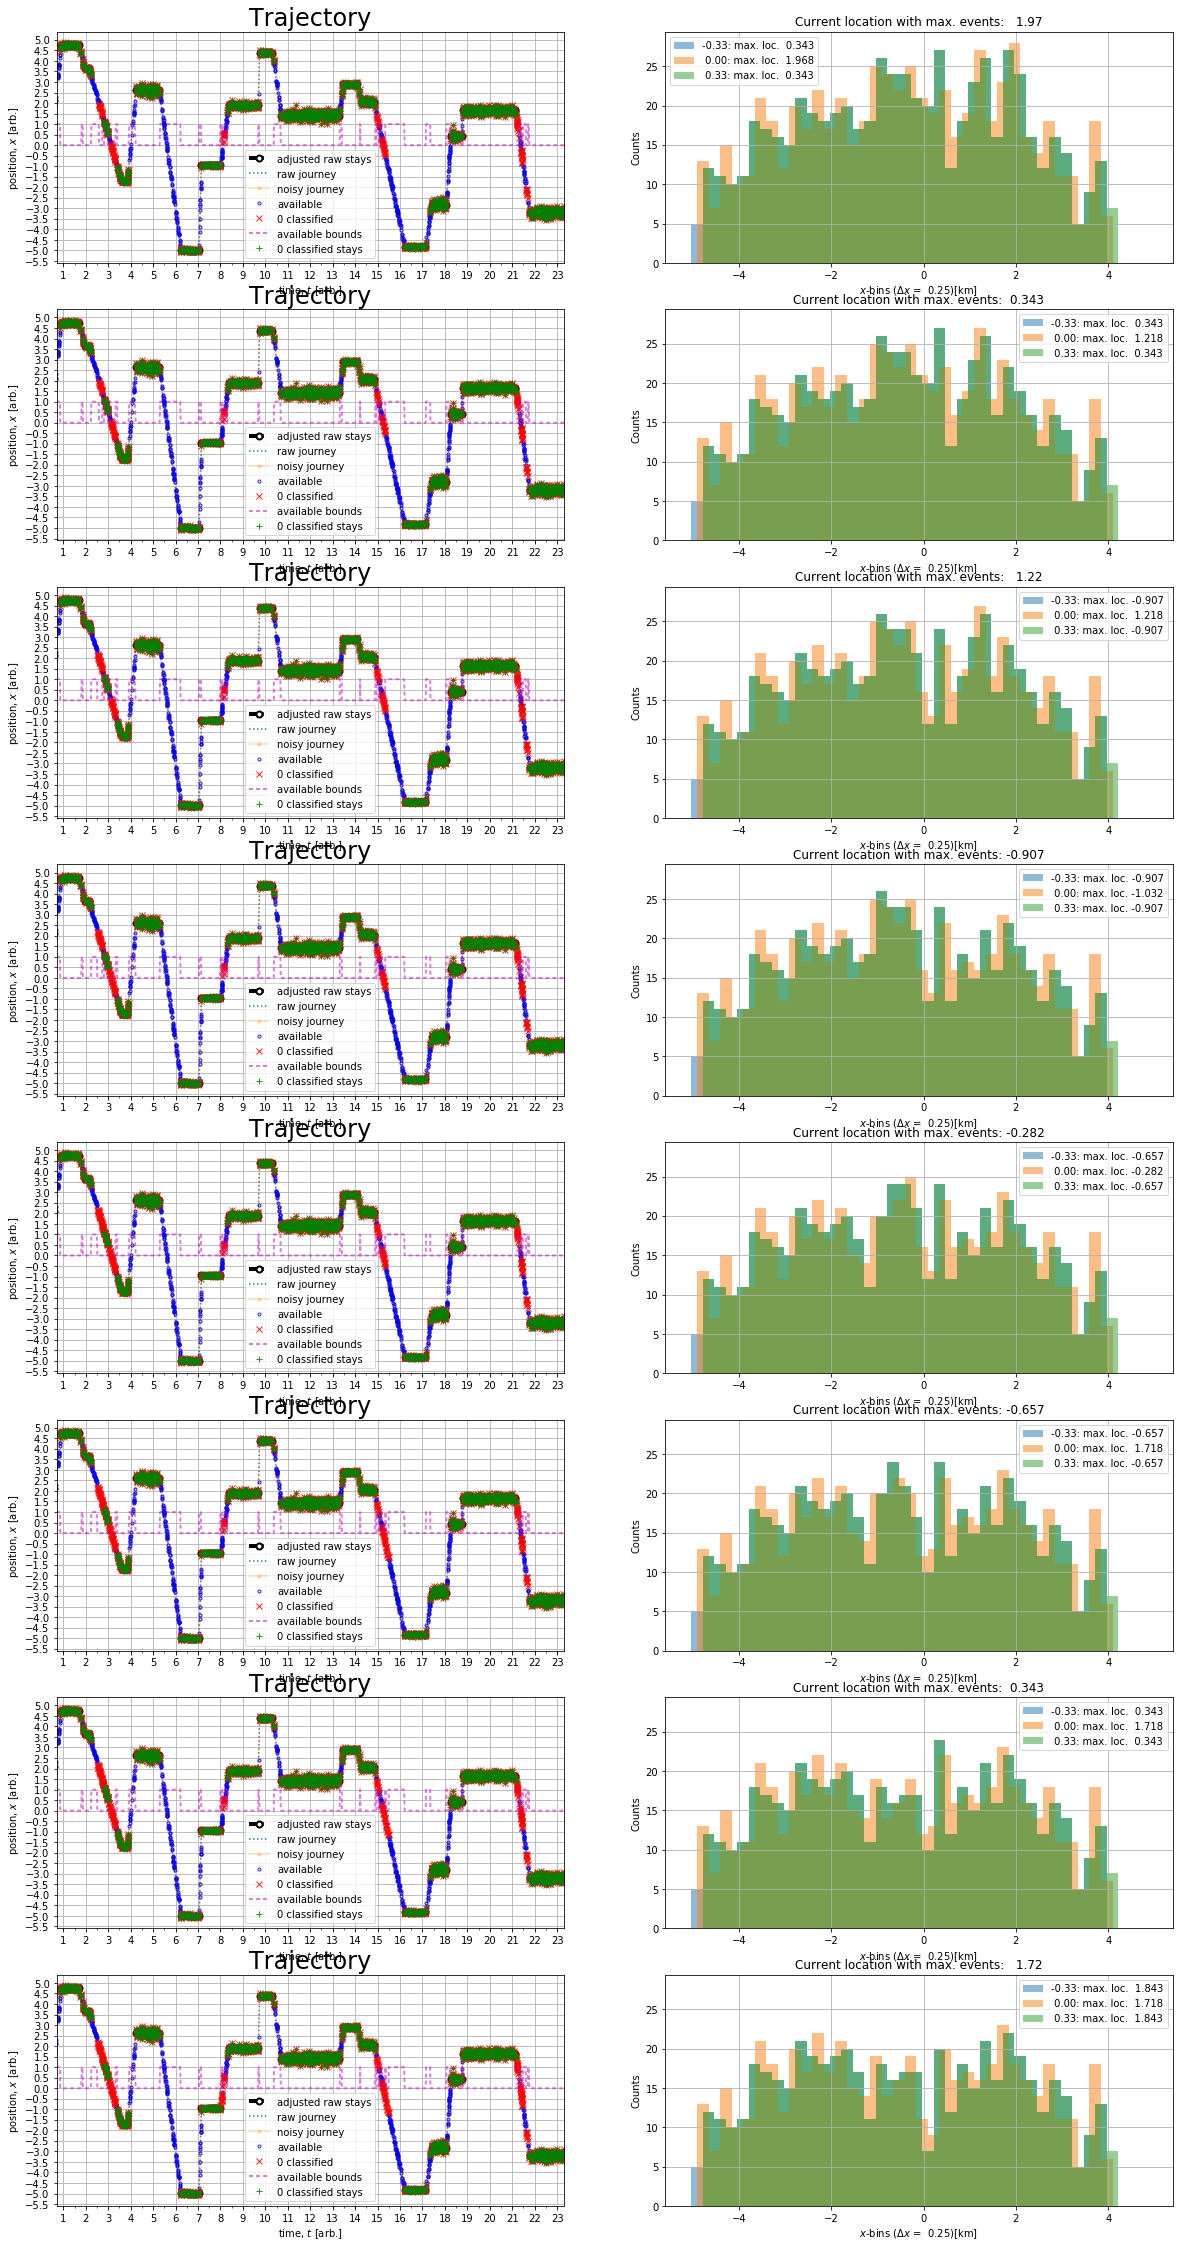

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [40]:
rows, cols = 8, 2
fig, axs = plt.subplots(rows, cols,figsize=[20,40])
axs = axs.flatten()

#--- PLOTTING
ylim = [x_arr.min()-2*dist_thresh, x_arr.max()+2*dist_thresh]

ax = axs[0]
add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
ax.plot(t_arr[gmask], x_arr[gmask], 'b.', markerfacecolor="None", alpha=0.85, label='available')
ax.plot(t_arr[gmask==False], x_arr[gmask==False], 'rx', markerfacecolor="None", alpha=0.85, label=f'{0} classified')
ax.plot(t_arr,gmask, color='m', linestyle='--', dashes=[2,1.5], lw=2, alpha=0.5, label='available bounds')    

ax.plot(t_arr[smask==False], x_arr[smask==False], 'g+', markerfacecolor="None", alpha=0.85, label=f'{0} classified stays')
ax.set_xlim(-0.1,24.1) 
ax.set_ylim(ylim)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.legend();

ax = axs[1]
_, max_counts, _ = plot_max_loc_(dist_thresh)(x_arr[gmask],ax);
ax.set_xlim(ylim)  
ax.set_ylim(0, max_counts+0.05*max_counts)  
ax.grid()
#--- PLOTTING

print("Total nr of events:", t_arr.size)


blockarrow = '--> --> --> '
n = 1
nn = 0 #1?
clusters = []

stop_early_counter = 0
##############################
nnn = 2
while nnn < rows*cols:

    if verbose: print(f'{n}: building cluster {nn}')

    # Get the location of the cluster with the max events
    loc = get_max_loc(x_arr[gmask])
    if verbose: print(f"\t{n}.1.1. Loc: {loc:6.3f}")

    #Get local mask based on bounding box
    mask = get_mask(t_arr[gmask], x_arr[gmask], loc, 2.5*time_thresh, dist_thresh, verbose)

    # These are the indices where the global mask is True;
    # ie., these promote the local mask to a global mask (see return)
    gmask_inds = np.where(gmask)[0]
    mask = gmask_inds[mask]
    
    # check if empty
    if mask.size > 0:
        
        
        ax = axs[nnn]
        add_plot_trajectory(t_arr, r_arr, x_arr, t_segs, x_segs, dist_thresh, ax);
        ax.plot(t_arr[gmask], x_arr[gmask], 'b.', markerfacecolor="None", alpha=0.85, label='available')
        ax.plot(t_arr[gmask==False], x_arr[gmask==False], 'rx', markerfacecolor="None", alpha=0.85, label=f'{0} classified')
        ax.plot(t_arr,gmask, color='m', linestyle='--', dashes=[2,1.5], lw=2, alpha=0.5, label='available bounds')    

        if verbose: print(f"\t{n}.1.2. Mean: {np.mean(x_arr[mask]):6.3f}, median: {np.median(x_arr[mask]):6.3f}")
        if verbose: print(f"\t{n}.1.3. Mask: [{mask[0]:5d}, {mask[-1]:5d}], Mask size: {mask.size:2d}")

        if verbose: print(f"\t{n}.2. Bounds: {t_arr[mask].min():6.3f}, {t_arr[mask].max():6.3f}")                
        # Create the bounding box (needed? if wanting to optimize the box, do here)
        bounds = np.array([t_arr[mask].min(), t_arr[mask].max()])            
        
        # Update the global mask
        # NOTE: doing this before the cluster append for the plotting
        gmask = update_global_mask(gmask, t_arr, bounds)        
        
        # Check the duration, save the cluster if it is long enough
        if t_arr[mask].max()-t_arr[mask].min()>time_thresh:
            smask = update_global_mask(smask, t_arr, bounds)
            clusters.append(mask)
            # This is a fail safe in case it goes to far: 
            #    * no one will have 20 clusters --> make smaller!                
            nn+=1
            if verbose: print(f"{blockarrow}Appending cluster")
            stop_early_counter = 0
        else:
            if verbose: print(f"{blockarrow}Too short, no append: {(t_arr[mask].max()-t_arr[mask].min()):6.4f} < {time_thresh:6.4f}")
            stop_early_counter += 1

        ax.plot(t_arr[smask==False], x_arr[smask==False], 'g+', markerfacecolor="None", alpha=0.85, label=f'{0} classified stays')
        ax.set_xlim(-0.1,24.1) 
        ax.set_ylim(ylim)
        ax.yaxis.set_major_locator(MultipleLocator(0.5))
        ax.legend();
            
        if verbose: print(f"\t{n}.3. gmask:",gmask.size, "==", gmask[gmask].size,"+",gmask[gmask==False].size)
        
        # Stop when there are more than 3 consecutive append-skips
        if (early_stopping) & (stop_early_counter >= 3):
            if verbose: print(f"\n{blockarrow}Early stopping")
            break
        
        # Stop when there are no more events available
        if gmask[gmask==False].size == gmask.size: 
            if verbose: print(f"\n{blockarrow}Breaking due to saturation")
            break

        ax = axs[nnn+1]
        plot_max_loc_(dist_thresh)(x_arr[gmask],ax);
        ax.set_xlim(ylim)  
        ax.set_ylim(0, max_counts+0.05*max_counts)  
        ax.grid()

    else:
        # Need to add even a single point to the global mask; 
        # breaking would exit prematurely
        if verbose: print(f"\n{blockarrow}Too short, no append: single event")
        if verbose: print(f"{blockarrow}Breaking due to single-event mask")                
        break # Can't continue: otherwise would endlessly loop
    
    # This is a fail safe in case it goes to far: 
    #    * no one will have 50 clusters --> make smaller!  
    nnn += 2
    n += 1
    
    print()

print('The trajectories show the clusters and the boundary of available events\n',
     'the histograms show the locations of available clusters');